In [1]:
!pip install pandas seaborn matplotlib scikit-learn

In [6]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()
df.info()
df.isnull().sum()
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


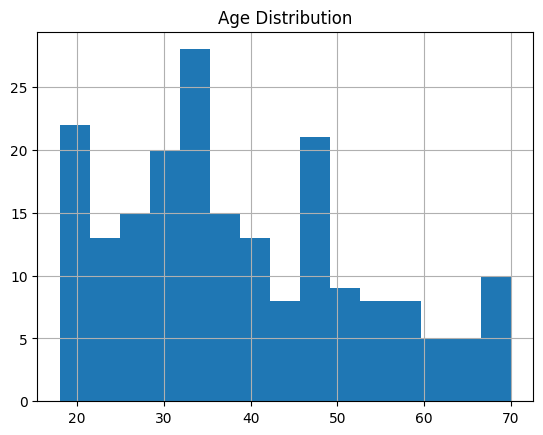

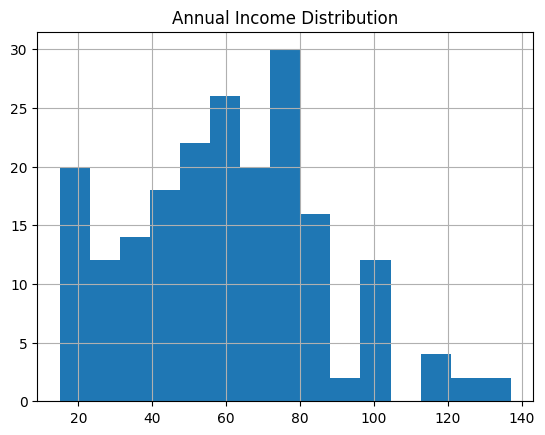

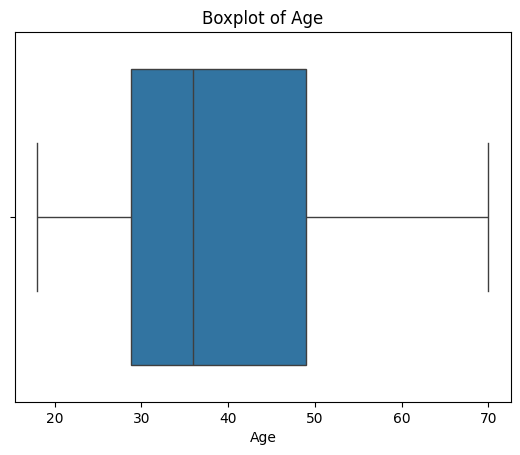

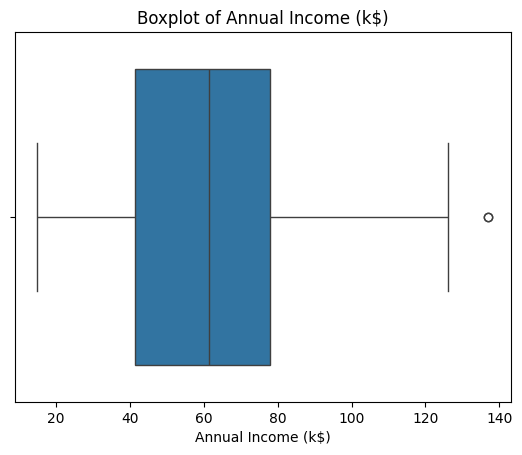

In [7]:
# 2. Exploratory Data Analysis (EDA)
# - Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df['Age'].hist(bins=15)
plt.title('Age Distribution')
plt.show()

df['Annual Income (k$)'].hist(bins=15)
plt.title('Annual Income Distribution')
plt.show()

# Boxplots
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income (k$)')
plt.show()


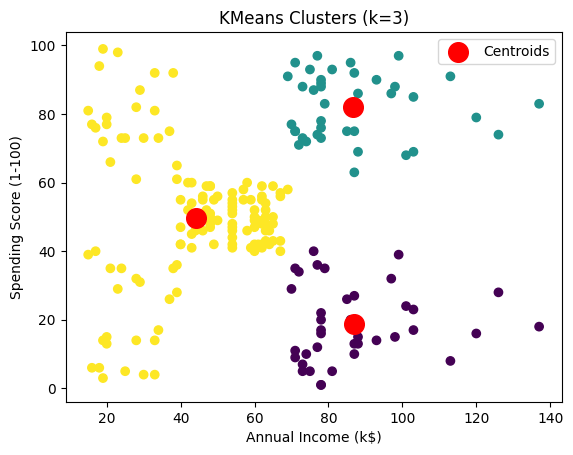

In [8]:
# 3. Feature Selection
# 	•	Use: `'Annual Income (k$)'` and `'Spending Score (1-100)'`.
# 4. K-Means with k=3
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('KMeans Clusters (k=3)')
plt.show()


In [9]:
# Intermediate Level
# 1. Preprocessing
# - Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])


In [10]:
# - Encoding (if using Gender):
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


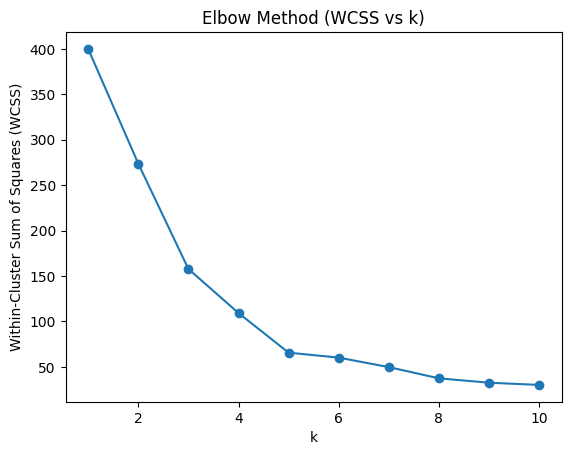

In [11]:
# 2. Elbow Method for Optimal k
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(X_scaled)
    wcss.append(kmean.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method (WCSS vs k)')
plt.xlabel('k')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [12]:
# 3. Cluster Profiling
optimal_k = 5  # example, replace with your elbow result
k_best = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = k_best.fit_predict(X_scaled)

profile = df.groupby('Cluster').agg({'Age':'mean', 'Annual Income (k$)':'mean', 'Spending Score (1-100)':'mean'})
print(profile)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


In [14]:
# Hard Level
# 1. High-Dimensional Clustering (all features)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_full = scaler.fit_transform(df[features])

# 2. PCA for Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full)


In [15]:
# 3. Cluster Stability Analysis
inertias = []
for state in [0,1,2,42,99]:
    kmeans = KMeans(n_clusters=optimal_k, random_state=state)
    kmeans.fit(X_full)
    inertias.append(kmeans.inertia_)

# Optionally, silhouette score:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_full, k_best.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.34219170811155797


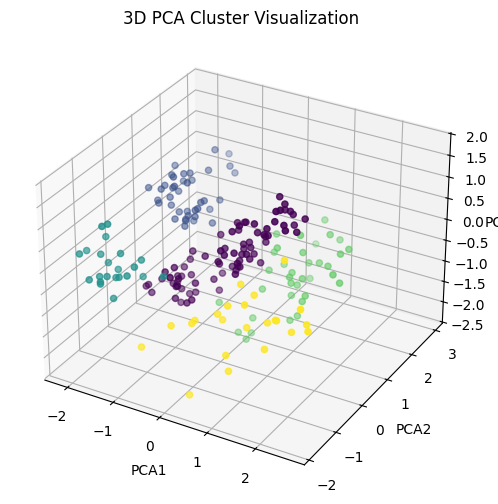

In [16]:
# Bonus: 3D Visualization with PCA
pca_3d = PCA(n_components=3)
X_pca3d = pca_3d.fit_transform(X_full)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3d[:,0], X_pca3d[:,1], X_pca3d[:,2], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('3D PCA Cluster Visualization')
plt.show()
